In [212]:
#Project Title: Attrition-Analysis-and-Prediction for Acme Corporation
#Submitted on: 07-06-2024
#Submitted by: Ankita purohit
#Submitted to: Technocolabs Softwares Inc
# Team: Data Scientist Team
#********************************************************************************************************************************************************
# importing libraries
from sklearn.datasets import make_blobs
# matplotlib for plotting
from matplotlib import pyplot as plt 
from matplotlib import style
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [213]:
#Reading the dataset from the local system
#Steps : Downlaod the file in your local system & rename the path as mentioned below before reading the file
dataset = pd.read_csv("C:\\Users\\Ankita\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv") 
#View First Five rows
dataset.head()

#First Tasks:
#Data Exploration & Data Cleaning
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<Axes: >

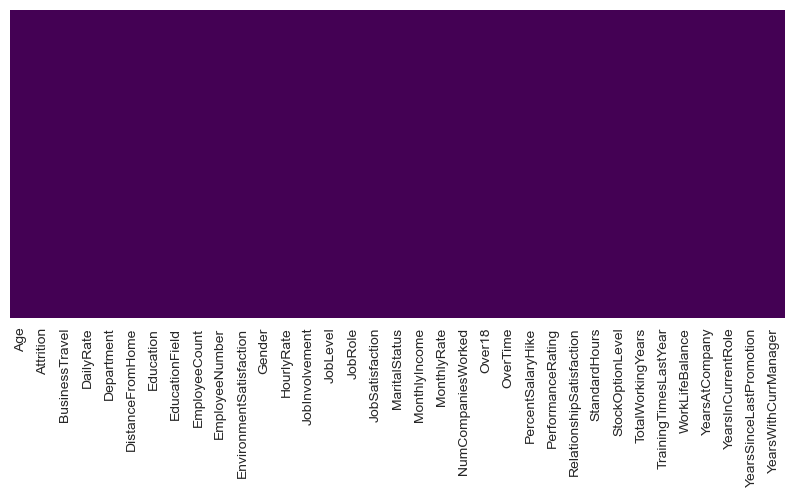

In [214]:
# Check for Missing values 
plt.figure(figsize =(10, 4)) 
sns.heatmap(dataset.isnull(),  
            yticklabels = False, 
            cbar = False, 
            cmap ='viridis')
#We can see in the below plot that there are no missing values

<Axes: xlabel='Attrition', ylabel='count'>

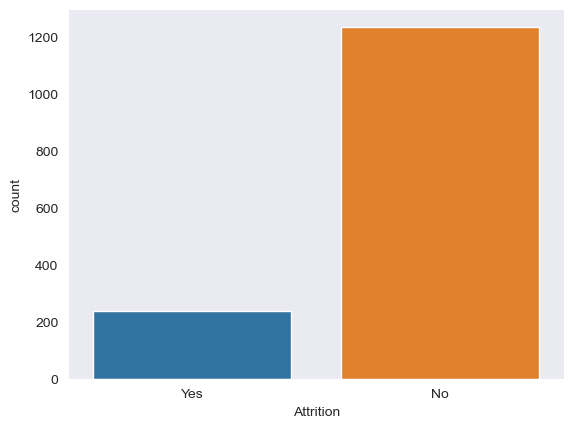

In [215]:
#This is a binary classification problem, i.e the Attrition or output is either yes or no, so we can see using below plot
sns.set_style('dark') 
sns.countplot(x ='Attrition', 
              data = dataset)

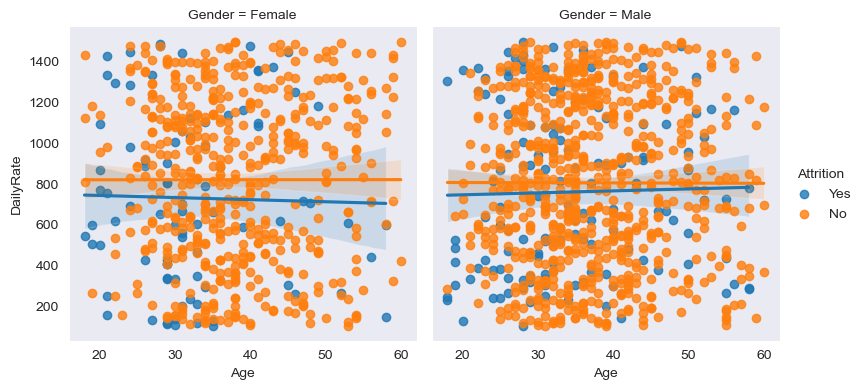

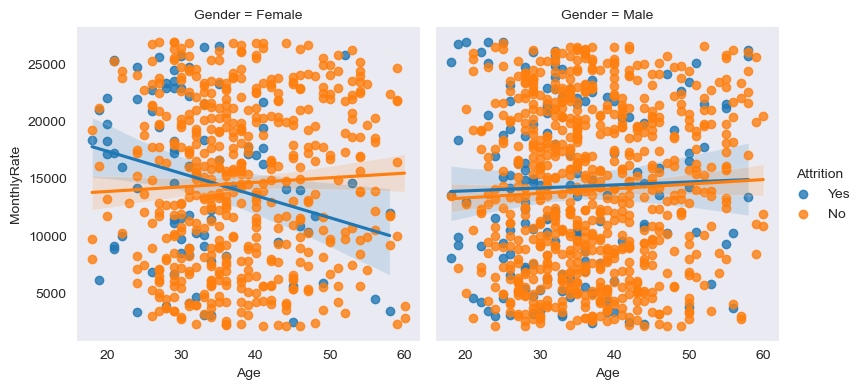

In [216]:
#The EDA is performed using Excel seeing the correlation of parameters againt the Attrition.
#The lmplot shows the relationship age vs monthly & daily rates for employee attrition for Female & Males.
#The spread is randomly spread across the regression plot line both for MALE & FEMALES, which shows no bias for attrition due to gender
sns.lmplot(
    data=dataset, x="Age", y="DailyRate",
    hue="Attrition", col="Gender", height=4
)
sns.lmplot(
    data=dataset, x="Age", y="MonthlyRate",
    hue="Attrition", col="Gender", height=4
)

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

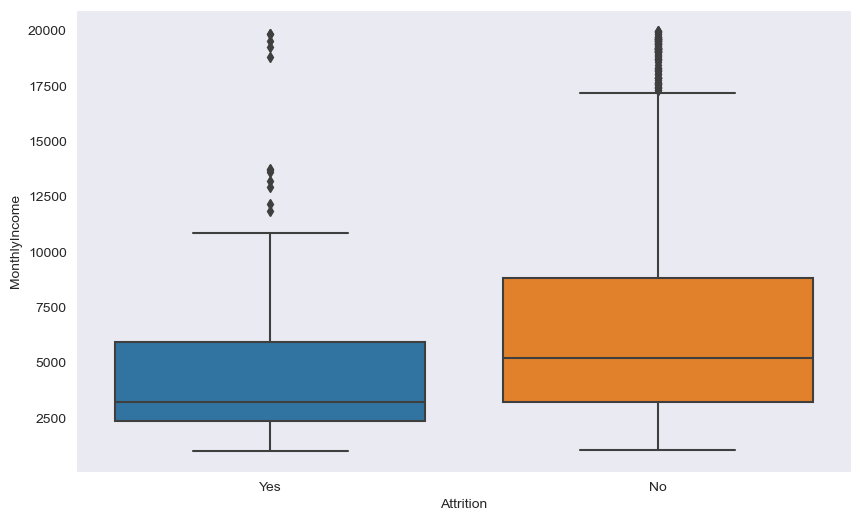

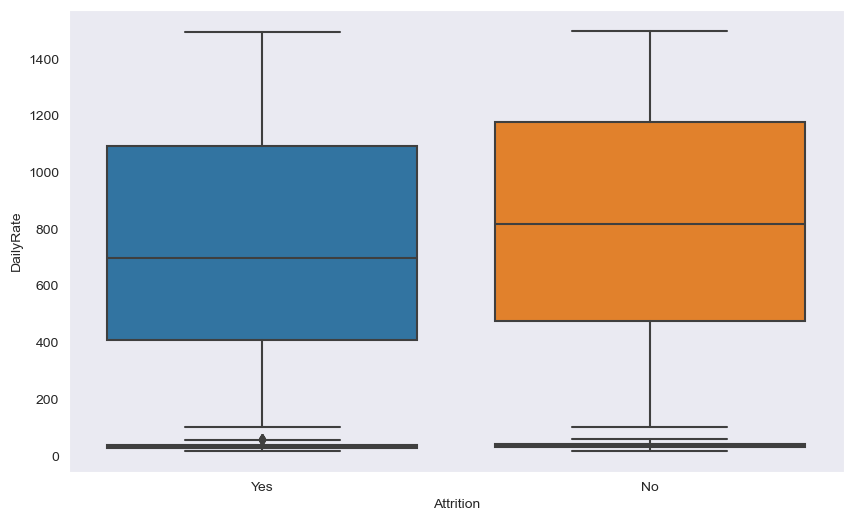

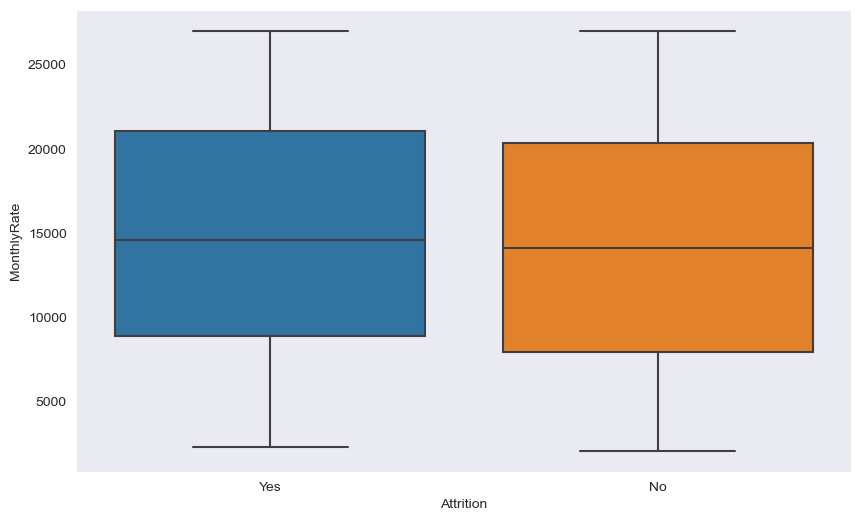

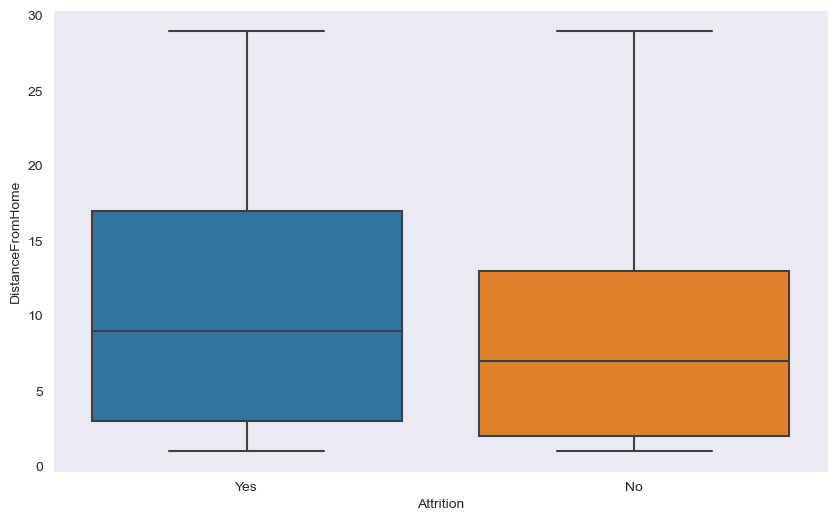

In [217]:
#Check for outliers in the dataset
plt.figure(figsize =(10, 6)) 
sns.boxplot(y ='MonthlyIncome',  
            x ='Attrition',  
            data = dataset) 
plt.figure(figsize =(10, 6)) 
sns.boxplot(y ='Age',  
            x ='Attrition',  
            data = dataset) 
sns.boxplot(y ='DailyRate',  
            x ='Attrition',  
            data = dataset) 
plt.figure(figsize =(10, 6)) 
sns.boxplot(y ='MonthlyRate',  
            x ='Attrition',  
            data = dataset) 
plt.figure(figsize =(10, 6)) 
sns.boxplot(y ='DistanceFromHome',  
            x ='Attrition',  
            data = dataset)

#Since most of the plots fall within the interquartile range we will consider all the datavalues for analysis

In [218]:
y = dataset.iloc[:, 1] 
X = dataset 

X.drop('Attrition', 
       axis = 1,  
       inplace = True)


In [219]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [220]:
#Data Preprocessing
#Removing unwanted columns from the dataset

X.drop('EmployeeCount', 
             axis = 1, 
             inplace = True) 
X.drop('StandardHours', 
             axis = 1, 
             inplace = True) 
X.drop('EmployeeNumber', 
             axis = 1,  
             inplace = True) 
X.drop('Over18',  
             axis = 1, 
             inplace = True) 
  
print(X.shape)

(1470, 30)


In [221]:
#Data Label & Encoding
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder() 
y = lb.fit_transform(y) 

In [222]:
# Creating dummies for categorical data
dum_BusinessTravel = pd.get_dummies(dataset['BusinessTravel'], 
                                    prefix ='BusinessTravel') 
  
dum_Department = pd.get_dummies(dataset['Department'], 
                                prefix ='Department') 
  
dum_EducationField = pd.get_dummies(dataset['EducationField'], 
                                   prefix ='EducationField') 
  
dum_Gender = pd.get_dummies(dataset['Gender'], 
                           prefix ='Gender', drop_first = True) 
  
dum_JobRole = pd.get_dummies(dataset['JobRole'], 
  
                            prefix ='JobRole') 
  
dum_MaritalStatus = pd.get_dummies(dataset['MaritalStatus'], 
  
                                  prefix ='MaritalStatus') 
  
dum_OverTime = pd.get_dummies(dataset['OverTime'], 
                             prefix ='OverTime', drop_first = True) 

In [223]:
# Adding these dummy variable to input X 
X = pd.concat([X, dum_BusinessTravel, dum_Department, 
              dum_EducationField, dum_Gender, dum_JobRole, 
              dum_MaritalStatus, dum_OverTime], axis = 1) 

In [224]:
# Removing the categorical data 
X.drop(['BusinessTravel', 'Department', 'EducationField', 
       'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], 
       axis = 1, inplace = True)

In [225]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

In [226]:
print(X.shape) 
print(y.shape)

(1470, 49)
(1470,)


In [227]:
#Step 2:Second Tasks: Building Machine Learning Models
#1. Perform regression Models
#1.a Dividing the data into testing & training sets
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split( 
  
   X, y, test_size = 0.25, random_state = 40)

In [228]:
#Obtaing results for Test & Trainn data for different models
from sklearn.model_selection import cross_val_predict, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_auc_score as ras
#Training the model
models = [LogisticRegression(),RandomForestClassifier(n_estimators=10,
                                 criterion='entropy')]
 
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
     
    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))
     
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

LogisticRegression() : 
Training Accuracy :  0.705941190648349
Validation Accuracy :  0.67873864726124

RandomForestClassifier(criterion='entropy', n_estimators=10) : 
Training Accuracy :  0.9999096167751265
Validation Accuracy :  0.7456422406498562



C:\Users\Ankita\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [230]:
#Selecting the best model i.e Random Forest Classifier since it gives better accuracy & printing the confusion matrix & accuracy reports
rf = RandomForestClassifier(n_estimators=10, 
							criterion='entropy') 
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test) 

def print_score(clf, X_train, y_train, 
				X_test, y_test, 
				train=True): 

	if train:
		print("Train Result:") 
		print("RFC Report 1: \n {}\n".format(classification_report( 
			y_train, clf.predict(X_train)))) 

		print("Confusion Matrix: \n {}\n".format(confusion_matrix( 
			y_train, clf.predict(X_train)))) 

		res = cross_val_score(clf, X_train, y_train, 
							cv=10, scoring='accuracy') 

		print("Average Accuracy: \t {0:.4f}".format(np.mean(res))) 
		print("Accuracy SD: \t\t {0:.4f}".format(np.std(res))) 
		print("----------------------------------------------------------") 

	elif train == False:
		print("Test Result:") 
		print("RFC Report 2: \n {}\n".format( 
			classification_report(y_test, clf.predict(X_test)))) 

		print("Confusion Matrix: \n {}\n".format( 
			confusion_matrix(y_test, clf.predict(X_test)))) 

		print("accuracy score: {0:.4f}\n".format( 
			accuracy_score(y_test, clf.predict(X_test)))) 

		print("-----------------------------------------------------------") 

print_score(rf, X_train, y_train, 
			X_test, y_test, 
			train=True) 

print_score(rf, X_train, y_train, 
			X_test, y_test, 
			train=False) 


Train Result:
RFC Report 1: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       922
           1       1.00      0.85      0.92       180

    accuracy                           0.98      1102
   macro avg       0.99      0.93      0.95      1102
weighted avg       0.98      0.98      0.97      1102


Confusion Matrix: 
 [[922   0]
 [ 27 153]]

Average Accuracy: 	 0.8457
Accuracy SD: 		 0.0174
----------------------------------------------------------
Test Result:
RFC Report 2: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       311
           1       0.82      0.16      0.26        57

    accuracy                           0.86       368
   macro avg       0.84      0.58      0.59       368
weighted avg       0.86      0.86      0.82       368


Confusion Matrix: 
 [[309   2]
 [ 48   9]]

accuracy score: 0.8641

-----------------------------------------------------------


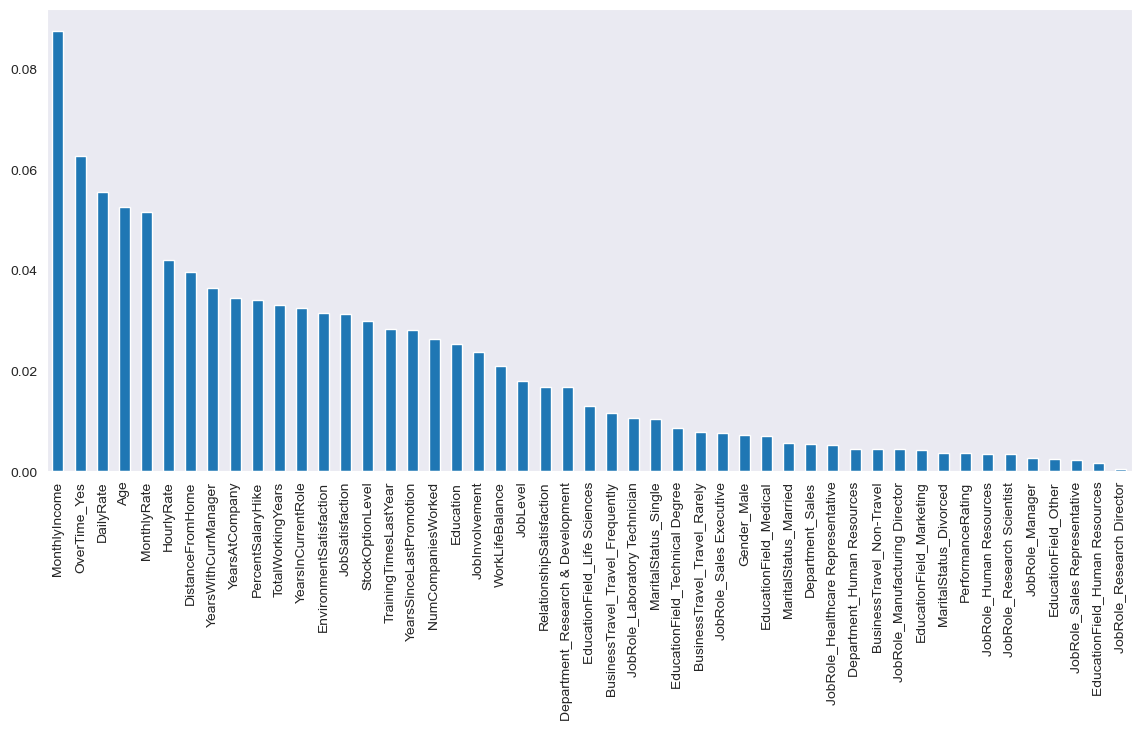

In [179]:
pd.Series(rf.feature_importances_, 
		index = X.columns).sort_values(ascending = False).plot(kind = 'bar', 
																figsize = (14,6)); 


In [ ]:
#Conclusion
# The accuracy score for Random Forest Classifier is 0.86 for test dataS
# The confusion matrix for test data indicates that out of 368 sampleSs 309 are classified correctlt correctly(+ve class) & 9 classified correctly for (-ve class) with accuracy score of .86
# The Random forest classifier marks the most important feature for predicting the result is Monthly Income and the least important feature is jobRole_Research Director

#Remedies
#The organisation should take into account the Monthly income to control the attrition rates & employee turnover

#********************************************************************************************************************************************************